In [152]:
import pandas as pd
import numpy as np
from scipy.special import expit

class Layer:
    def __init__(self, n_in, n_out, atv_func = 'sigmoid'):
        self.w = np.random.normal(0, 0.1, size = (n_in, n_out))
        self.b = np.random.normal(0, 0.1, size = (1, n_out))
        self.atv_func = atv_func
        self.out = None
        self.delta = None
        self.func_dict = {'sigmoid' : Sigmoid}
        
    def Activate(self, _in):
        _out = np.dot(_in, self.w) + self.b
        self.out = self.func_dict[self.atv_func](x = _out)
        return self.out

class Inference:
    def __init__(self, lr = 0.01):
        self.layers = []
        self.lr = lr
        self.mse = []
        self.train_acc = []
        self.test_acc = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
        
    def feed_forward(self, x):
        for layer in self.layers:
            x = layer.Activate(x)
        return x
    
    def Bp(self, x, y_pred, y_label):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            if layer == self.layers[-1]:
                layer.delta = (y_label - y_pred) * d_act(layer.out, layer.atv_func)
            else:
                next_layer = self.layers[i + 1]
                layer.delta = np.dot(next_layer.delta, next_layer.w.T) * d_act(layer.out, layer.atv_func)
    
        for i in range(len(self.layers)):
            layer = self.layers[i]
            layer.w += self.lr * (x if i == 0 else self.layers[i - 1].out).T.dot(layer.delta) / x.shape[0]
            layer.b += self.lr * np.sum(layer.delta, axis = 0) / x.shape[0]
    
    def train(self, x_train, y_train, y_onehot, x_test, y_test, epochs):        
        for i in range(epochs):
            y_pred = self.feed_forward(x_train)
            self.Bp(x_train, y_pred, y_onehot)
            
            y_train_pred = self.feed_forward(x_train)
            self.mse.append(MSE(y_onehot, y_train_pred))
            self.train_acc.append(self.acc(y_train_pred, y_train))
            y_test_pred = self.feed_forward(x_test)
            self.test_acc.append(self.acc(y_test_pred, y_test))
            if(i % 100 ==0):         
                print('Epochs: #%s, MSE: %.2f, Train_Acc: %.2f%%, Test_Acc: %.2f%%' % (i, MSE(y_onehot, y_train_pred), self.acc(y_train_pred, y_train) * 100, self.acc(y_test_pred, y_test) * 100))
    
    def acc(self, y_pred, y_label):        
        y_pred = np.argmax(y_pred, axis=1)
        return np.mean(y_pred == y_label)

Sigmoid = lambda x : expit(x)


# def Sigmoid(x):
#     '''
#     if(x >= 0):
#         return 1/ (1 + np.exp(-x))
#     else:
#         return np.exp(x) / (1 + np.exp(x))
#     '''
#     return 1/ (1 + np.exp(-x))

    
def d_act(x, atv):
    if atv == 'sigmoid':
        return (1 - x) * x        

def MSE(y_label, y_pred):
    return np.mean(np.mean(np.square(y_label - y_pred), axis = 1), axis = 0)

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./iris.csv",header=None)
x = np.array(df.iloc[:,2:6])
y = np.array(df.iloc[:,1])
y_onehot = np.zeros((x.shape[0], 3))
y_onehot[np.arange(y.shape[0]), y] = 1

length = x.shape[0]
split = int(0.75*length)
x_train = x[ : split]
x_test = x[split+1 : ]
y_train = y[ : split]
y_test = y[split+1 : ]

y_onehot = y_onehot[ : split]


Epochs: #0, MSE: 0.25, Train_Acc: 35.71%, Test_Acc: 27.03%
Epochs: #100, MSE: 0.21, Train_Acc: 59.82%, Test_Acc: 56.76%
Epochs: #200, MSE: 0.18, Train_Acc: 75.00%, Test_Acc: 67.57%
Epochs: #300, MSE: 0.16, Train_Acc: 87.50%, Test_Acc: 81.08%
Epochs: #400, MSE: 0.14, Train_Acc: 93.75%, Test_Acc: 86.49%
Epochs: #500, MSE: 0.13, Train_Acc: 93.75%, Test_Acc: 94.59%
Epochs: #600, MSE: 0.12, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #700, MSE: 0.12, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #800, MSE: 0.11, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #900, MSE: 0.10, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1000, MSE: 0.10, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1100, MSE: 0.09, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1200, MSE: 0.09, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1300, MSE: 0.09, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1400, MSE: 0.08, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1500, MSE: 0.08, Train_Acc: 96.43%, Test_Acc: 97.30%
Epochs: #1600, MSE: 

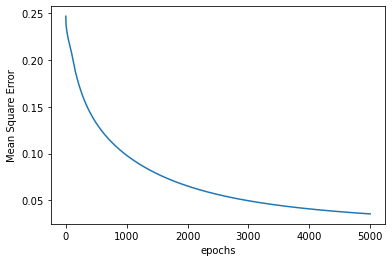

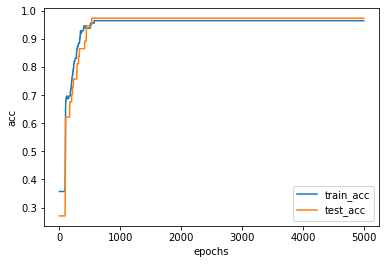

In [192]:
np.random.seed(20)

nn = Inference(lr = 0.05)
nn.add_layer(Layer(4, 5))
nn.add_layer(Layer(5, 3))

nn.train(x_train, y_train, y_onehot, x_test, y_test, 5000)
plt.plot(nn.mse)
plt.xlabel('epochs')
plt.ylabel('Mean Square Error')
plt.show()
plt.plot(nn.train_acc, label = 'train_acc')
plt.plot(nn.test_acc, label = 'test_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [193]:
for layer in nn.layers:
    print(layer.w, layer.b)

[[ 0.2669806   0.02583629  0.25565906 -1.39178929  0.10014447]
 [ 0.44255021  0.13347482  0.37962975 -0.78153422  0.45475339]
 [-0.26720925  0.04426243 -0.39441971  0.70755875 -0.34975986]
 [-0.10444113  0.13317397 -0.00618486  0.66671308 -0.04388396]] [[-0.02254574 -0.31614746  0.10471034  0.22616619 -0.02957901]]
[[-1.61905242  0.63263458  1.08621474]
 [ 0.63064333 -0.28959094 -2.10368196]
 [-1.5489799   0.64126642  1.01928148]
 [ 1.1187308  -3.44387389  2.42846308]
 [-1.81745847  0.73282522  0.86160951]] [[ 0.59401941 -0.05872919 -2.0847781 ]]
